# **Zagadnienie przeszukiwania i podstawowe podejścia do niego**
# Wykonawca - Levchenko Sofiia

## Wstęp
Na tym ćwiczeniu zajęliśmy się problemem znalezienia minimum funkcji o dowolnych parametrach i liczbie zmiennych. Aby ten problem rozwiązać, został zaimplementowany algorytm gradientu prostego, często wykorzystywany do lokalizacji ekstremów lokalnych funkcji różniczkowalnych. 

### Wykorzystane narzędzia
W celu *implementacji* wyżej wspomnianego algorytmu, zostały wykorzystane pakie biblioteki jak `numpy`, `sympy` oraz `copy`.

 Pierwsza wspomniana biblioteka pozwala na swobodne posługiwanie się podstawowymi metodami obliczeń numerycznych, natomiast druga (która jest w pewny sposób rozszerzeniem pierwszej) na wykorzystanie postaci symbolowych do reperezentacji funkcji algebraicznych. Biblioteka `copy` natomiast została wykorzystana w celu tworzenia kopii wartości zmiennych (a nie ich położenia w pamięci), w celu uniknięcia nieporządanego zachowania wykorzystywanych zmiennych. 

Kolejne biblioteki, czyli `pandas`, `matplotlib` oraz `tabulate` zostały wykorzystane do *przetworzenia* otrzymanych wyników oraz ich *wizualizacji* w postaci czytelnej dla człowieka.

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from copy import copy

## Implementacja algorytmu
Implementację algorytmu podzieliliśmy na dwie częsci. Najpierw została zimplementowana *funkcja pomocnicza*, która pozwala na obliczenie gradientu funkcji. Wynikiem jej działania jest gradient funkcji (tablica składająca się z pochodnych cząstkowych) zwracany w postaci symbolicznej.


---


Do zwróconego wyniku, w razie potrzeby, można *podstawiać* wartości liczbowe, gdy na celu mamy uzyskanie wartości liczbowej gradientu w konkretnym punkcie.

In [2]:
def gradient(func):
    gradient = [];
    variables = sorted(func.free_symbols, key = lambda symbol: symbol.name)
    for variable in variables:
        gradient.append(sp.diff(func, variable))
    return gradient

W następnej kolejności został zaimplementowany *algorytm poszukiwania minimum zadanej funkcji*. Algorytm ten działa na zasadzie "oblicz gradient w bieżącym punkcie i poruszaj się w odwrotnym od narastania funkcji kierunku". Algorytm kończy swoje działanie w momencie gdy zostanie spełniony jeden z warunków: 

*   Ilość iteracji przekrczy wartośc maksymalną dopuszczalną;
*   Wartość RMSE (Root-mean-square deviation), obliczana na podstawie porównania bieżącego i poprzedniego wyniku poszukiwania, osiągnie porządanego poziomu dokładności;

Ten algorytm opiera się wyłącznie na *wartośc gradientu w danym punkcie*, co oznacza, że za jego pomocą możemy znaleźć *minimum lokalny* funkcji.



In [3]:
def find_minimum(func, start_point, step_size, treshold, max_iter):
  
  result = copy(start_point)
  variables = sorted(func.free_symbols, key = lambda symbol: symbol.name)
  func_gradient = gradient(func)

  rmse = treshold*2
  iter = 0
  
  while iter<max_iter and rmse>treshold:
    old_result = copy(result)
    rmse = 0
    i = 0
    j = 0
    while i<len(variables):
      gradient_value = func_gradient[i].evalf(subs = dict(zip(variables,old_result)))
      result[i] = result[i] - step_size*gradient_value
      i+=1
    while j<len(result):
      rmse = rmse + (old_result[j] - result[j])**2
      j+=1
    rmse = np.square(rmse/len(result))
    iter+=1

  return result

## Testowanie algorytmu

### Określenie hiperparametrów i badanych funkcji
Aby uzyskane wyniki były wystarczająco dokładne, została wybrana wystarczająco *duża liczba iteracji* oraz *mała wartości granicznej RMSE*. W celu zbadania wpływu rozmiaru kroku (dla różnych punktów startowych) na wynik działania algorytmu, została też zdefiniowana lista wartości kroku.

In [ ]:
x = sp.Symbol('x')
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')

f = x ** 4
g = 1.5 - sp.exp(-x1**2 - x2**2) - 0.5*sp.exp(-(x1-1)**2 - (x2+2)**2)

rmse_treshold = 1e-20
max_iter = 5000
step = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

### Losowanie punktów startowych
Podczas losowania puktów musimy jednak pamiętać, że nie każda funkcja ma fluktuacje w całej swojej dziedzinie, co oznacza, że są odcinki, gdzie funkcje są stałe lub *prawie stałe*. To z kolei przekłada się na to, że *gradient* w takich punktach będzie tak *mały*, że hiperparametr, określający *krok* (przemieszczenie się odnośnie punktu startowego) będzie *niewystarczająco duży*, aby w ramach określonej liczby iteracji dotrzeć do ekstremum lokalnego danej funkcji.

Musimy wziąć to pod uwagę podczas wybierania promienia (od znanego wcześniej punktu minimum wybranej funkcji) losowanych punktów dla poszczególnych funkcji.


---


Aby dało się wyliczyć wartośc średnią i odchylenie standardowe znalezionego minimum funkcji, próbka musi zawierać więcej niż jeden punkt startowy. Wybrana została ilość 15 (nie za mała i nie za duża), jednak ona może uleć zmianie, jeżeli taka potrzeba zaistnieje.


---



Najpierw został wylosowany zestaw punktów startowych dla pierwszej badanej funkcji, czyli:

`f(x) = x^4 `

Losowane punkty są z zakresu `[0, 2.5]`.

In [5]:
data_sets_f = []
i=0
while i<15:
  random_data = np.random.rand(1)
  random_multiplier = np.random.randint(1, 2.5)
  data_sets_f.append(np.multiply(random_data, random_multiplier))
  i+=1
print(data_sets_f)

[array([0.08508593]), array([0.44282895]), array([0.6229923]), array([0.53963803]), array([0.87381381]), array([0.44803553]), array([0.27248259]), array([0.94264692]), array([0.75448162]), array([0.09673479]), array([0.24271507]), array([0.30267873]), array([0.69815065]), array([0.00643102]), array([0.92477782])]


Dalej został wylosowany zestaw punktów startowych dla kolejnej badanej funkcji, czyli:

`g(x1, x2) = 1.5 - exp(-x1^2 - x2^2) - 0.5*exp(-(x1-1)^2 - (x2+2)^2) `

Każda współrzędna punktu startowego wylosowana została z zakresu `[0, 4]`.

In [6]:
data_sets_g = []
i=0
while i<15:
  random_data = np.random.rand(2)
  random_multiplier = np.random.randint(1, 4)
  data_sets_g.append(np.multiply(random_data, random_multiplier))
  i+=1
print(data_sets_g)

[array([0.0428499 , 0.17472357]), array([0.19989769, 2.90565725]), array([0.04446206, 1.25405081]), array([1.53809323, 0.8192975 ]), array([0.90027523, 0.14267158]), array([0.52714064, 0.6277615 ]), array([1.58206893, 0.67687524]), array([1.66642306, 1.81229209]), array([0.45287303, 1.10485176]), array([0.79455952, 1.41812178]), array([0.01752324, 0.8920524 ]), array([2.12646426, 2.89787478]), array([0.64371137, 0.07112979]), array([0.90756728, 0.93189543]), array([0.17889272, 0.20307514])]


### Uruchomienie algorytmu i wizualizacja wyników

In [ ]:
result_computed_f = []
raw_result = []
step = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
i=0
j=0
while j<len(step):
  i=0
  result_part = []
  raw_result_part = []
  while i<len(data_sets_f):
    result_part.append(find_minimum(f, data_sets_f[i], step[j], rmse_treshold, max_iter))
    raw_result_part.append(result_part[i][0])
    i+=1
  f_analysis = pd.Series(result_part)
  raw_result.append(raw_result_part);
  result_computed_f.append(np.array([step[j], f_analysis.mean(), f_analysis.std()], dtype=object))
  j+=1
print("Table with result (minimum of the %s function) depending on step's size:" % f, end="\n\n")
print(tabulate(result_computed_f, headers=['Step', 'Mean Value', 'Standard Variation'], tablefmt="fancy_grid"), end="\n\n\n")

Visialization of result (minimum of the x**4 function) depending on step's size:



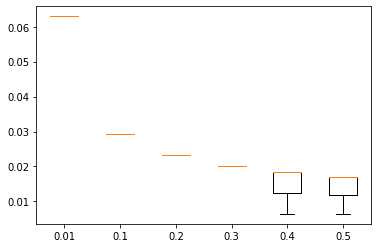

In [8]:
print("Visialization of result (minimum of the %s function) depending on step's size:" % f, end="\n\n")
fig, ax = plt.subplots()
ax.boxplot(raw_result, showfliers=False)
plt.xticks([1,2,3,4,5,6], step)
plt.show()

Visualization of result (minimum of the x**4 function) depending on number of iterations:



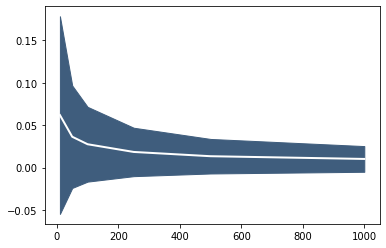

In [9]:
f_mean = []
f_variation = []
max_iterations = [10, 50, 100, 250, 500, 1000]
step = 0.4
i=0
j=0
while j<len(max_iterations):
  i=0
  result_part = []
  raw_result_part = []
  while i<len(data_sets_f):
    result_part.append(find_minimum(f, data_sets_f[i], step, rmse_treshold, max_iterations[j]))
    raw_result_part.append(result_part[i][0])
    i+=1
  f_analysis = pd.Series(result_part)
  f_mean.append(f_analysis.mean())
  f_variation.append(f_analysis.std())
  j+=1
print("Visualization of result (minimum of the %s function) depending on number of iterations:" % f, end="\n\n") 
plt.plot(np.array(max_iterations), np.array(f_mean).reshape(-1, order='F'), color="white", lw=2) 
plt.fill_between(np.array(max_iterations), np.array(f_mean).reshape(-1, order='F') - np.array(f_variation), np.array(f_mean).reshape(-1, order='F') + np.array(f_variation), color="#3F5D7D") 
plt.show()

In [ ]:
variables_g = sorted(g.free_symbols, key = lambda symbol: symbol.name)
step = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
result_computed_g = []
raw_result = []
j=0
while j<len(step):
  i=0
  result_part = []
  while i<len(data_sets_g):
    result_part.append(find_minimum(g, data_sets_g[i], step[j], rmse_treshold, max_iter))
    i+=1
  g_analysis = pd.DataFrame(result_part, columns = variables_g)
  raw_result.append(result_part);
  result_computed_g.append(np.array([step[j], g_analysis.mean().to_string(), g_analysis.std().to_string()], dtype=object))
  j+=1
print("Table with result (minimum of the %s function) depending on step's size:" % g, end="\n\n")
print(tabulate(result_computed_g, headers=['Step', 'Mean Value', 'Standard Variation'], tablefmt="fancy_grid"))

Visialization of result (minimum of the -exp(-x1**2 - x2**2) - 0.5*exp(-(x1 - 1)**2 - (x2 + 2)**2) + 1.5 function) depending on step's size:

For variable x1 and different step values:



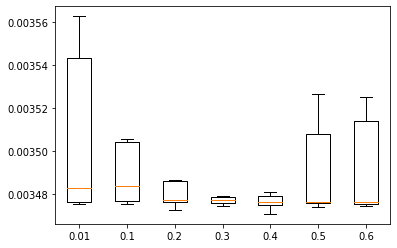

For variable x2 and different step values:



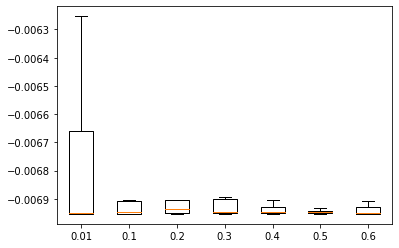

In [11]:
variables_set = np.random.random((len(variables_g), len(raw_result), len(data_sets_g)))
i=0
while i<len(raw_result):
  j=0
  reshape_phase_one = np.array(raw_result[i]).reshape(-1, order='F')
  reshape_phase_two = reshape_phase_one.reshape(len(variables_g), len(data_sets_g))
  while j<len(reshape_phase_two):
    variables_set[j][i] = copy(reshape_phase_two[j])
    j+=1
  i+=1
i=0
print("Visialization of result (minimum of the %s function) depending on step's size:" % g, end="\n\n")
while i<len(variables_set):
  print("For variable %s and different step values:" % variables_g[i], end="\n\n")
  reshape_phase_one = np.array(variables_set[i]).reshape(-1)
  reshape_phase_two = reshape_phase_one.reshape(len(data_sets_g), len(step))
  fig, ax = plt.subplots()
  ax.boxplot(reshape_phase_two, showfliers=False)
  plt.xticks([1,2,3,4,5,6,7], step)
  plt.show()
  i+=1

Visualization of result (minimum of the -exp(-x1**2 - x2**2) - 0.5*exp(-(x1 - 1)**2 - (x2 + 2)**2) + 1.5 function) depending on number of iterations

For x1 variable:



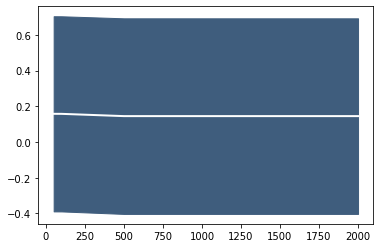

For x2 variable:



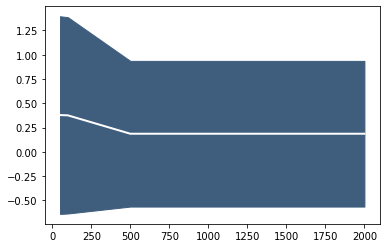

In [12]:
max_iterations = [50, 100, 500, 1000, 1500, 2000]
g_mean = np.random.random((len(variables_g), len(max_iterations)))
g_variation = np.random.random((len(variables_g), len(max_iterations)))
step = 0.5
j=0
while j<len(max_iterations):
  i=0
  k=0
  result_part = []
  while i<len(data_sets_g):
    result_part.append(find_minimum(g, data_sets_g[i], step, rmse_treshold, max_iterations[j]))
    i+=1
  g_analysis = pd.DataFrame(result_part, columns = variables_g)
  while k<len(variables_g):
    g_mean[k][j] = g_analysis.mean().values[k]
    g_variation[k][j] = g_analysis.std().values[k]
    k+=1
  j+=1
i=0
print("Visualization of result (minimum of the %s function) depending on number of iterations" % g, end="\n\n") 
while i<len(variables_g):
  print("For %s variable:" % variables_g[i], end="\n\n") 
  plt.plot(np.array(max_iterations), np.array(g_mean[i]).reshape(-1, order='F'), color="white", lw=2) 
  plt.fill_between(np.array(max_iterations), np.array(g_mean[i]).reshape(-1, order='F') - np.array(g_variation[i]), np.array(g_mean[i]).reshape(-1, order='F') + np.array(g_variation[i]), color="#3F5D7D") 
  plt.show()
  i+=1

## Wnioski i obserwacje
Na podstaiwe otrzymanych wyników można zrobić wniosek, że algorytm ten działa dosyć sprawnie, kiedy punkt początkowy znajduje się blisko szukanego ekstremum. W przeciwnym przypadku istnieje potrzeba odpowiednio dostosowywać krok oraz wartości hiperparametrów (takich jak liczba iteracji), aby wynik spełniał wymagania i był wystarczająco blisko minimum lokalnego funkcji.

---

W przypadku badanych funckji f(x) i g(x1, x2), zaobserwowano, że dla tych dwóch funkcji najbardziej optymalna wartość kroku różni się. I jeżeli dla funkcji g(x1, x2) możemy, na podstawie otrzymanych wyników, stwierdzić, że krok ~0.5 (wśród innych badanych kroków) jest najbardziej korzystnym zarówno jak w przypadku minimalizacji wartości średniej, tak i minimalizacji wariancji, tto dla funkcji f(x) jest to trudniejszym zadaniem. Dla funkcji f(x) wykorzystanie kroku o wartości ~0.2 pozwoliło na minimalizację odchyleniia standardowego, natomiast wykorzystanie kroku ~0.4 - na minimalizację wartości średniej (to, jak blisko znajduje się rzeczywistego minimum funkcji). 

*Ważne: wszystkie wartości liczbowe, przedstawione w akapicie powyżej,dotyczą początkowego stanu kodu (jeżeli hiperparametry oraz promień losowanych wartości nie zostały zmienione).*

Dość oczywistym wnioskiem jest to, że przy zwiększeniu liczby iteracji dokładność wyniku (jego wartość średnia zbliża się do minimum, a wartość odchylena standardowego odpowiednio maleje) jest co raz większa. Co jest ciekawe, to że po osiągniciu pewnej wartości "granicznej" (kilka tysięcy iteracji), odchyleenie standardowe funkcji g(x1, x2) nagle maleje do wartości pomijalnie małych.

---

Warto też wspomnieć, że są też sposoby na optymalizację tego algorytmu, przykładowo, można by było dodać trochę *inteligencji* poprzez dostosowywanie kroku na podstawie wartości gradientu (im mniejszy gradient, tym większy krok, a w prrzypadku gdy gradient zmienia znak, to krok zmneijszamy, bo to oznacza, że już "przeskoczyliśmy" ekstremum).